In [33]:
import os
import ctypes

# 🔹 Inserisci qui il percorso completo della DLL
dll_path = r"C:\Users\HYPERSPIM2\Documents\MANUALE_SLM_IR_HAMAMATSU_LSH0905569\LCOS-SLM_Control_software_Sample_source_code\Python_sample_code\python_sample_code_64bit\Image_Control.dll"
# 1. Verifica se la DLL esiste
if not os.path.exists(dll_path):
    print(f"❌ DLL non trovata: {dll_path}")
else:
    print(f"✅ DLL trovata: {dll_path}")
    
    try:
        # 2. Carica la DLL usando il percorso assoluto
        Lcoslib = ctypes.windll.LoadLibrary(dll_path)
        print("✅ DLL caricata correttamente!")
        
        # 3. Prova a vedere una funzione nota
        try:
            AxiconLens = Lcoslib.AxiconLens
            print("🔎 Funzione AxiconLens trovata nella DLL!")
        except AttributeError:
            print("⚠️ Funzione AxiconLens NON trovata nella DLL (forse nome export diverso).")
        
        # 4. Controllo architettura DLL / Python
        import struct
        py_bits = struct.calcsize("P") * 8
        print(f"💻 Python: {py_bits}-bit")
        print("⚠️ Assicurati che la DLL abbia la stessa architettura (32/64-bit) di Python!")

    except OSError as e:
        print(f"❌ Errore durante il caricamento della DLL: {e}")
        print("💡 Possibili cause:")
        print("- DLL a 32-bit vs Python a 64-bit (o viceversa)")
        print("- Dipendenze mancanti (Visual C++ Redistributable non installato)")
        print("- Percorso DLL non corretto")


✅ DLL trovata: C:\Users\HYPERSPIM2\Documents\MANUALE_SLM_IR_HAMAMATSU_LSH0905569\LCOS-SLM_Control_software_Sample_source_code\Python_sample_code\python_sample_code_64bit\Image_Control.dll
✅ DLL caricata correttamente!
🔎 Funzione AxiconLens trovata nella DLL!
💻 Python: 64-bit
⚠️ Assicurati che la DLL abbia la stessa architettura (32/64-bit) di Python!


In [34]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *
import copy
import show_slm2
import pattern



    
#LCOS pixel size e laser
nx = 1272
ny = 1024
wavelength=1064e-9
dx=12.5e-6   #LCOS pixel pitch    

#LCOS-SML monitor number setting
monitorNo = 2
windowNo = 1
xShift = 0
yShift = 0
    


array_size = nx * ny
FARRAY = c_uint8 * array_size

# make the 8bit unsigned integer array instance
farray = FARRAY(0)
farray2 = FARRAY(0)
farray3 = FARRAY(0)
farray4 = FARRAY(0)

In [35]:
correction=Image.open(r"C:\Users\HYPERSPIM2\Documents\MANUALE_SLM_IR_HAMAMATSU_LSH0905569\Correction_patterns\CAL_LSH0905569_1064nm.bmp")
ma=np.max(correction)
correction_rad=np.array(correction)/ma*(2*np.pi)
size=correction_rad.shape
numberpixelsx=size[1]
numberpixelsy=size[0]



In [12]:
cgh=Image.open(r"C:\Users\HYPERSPIM2\Documents\MANUALE_SLM_IR_HAMAMATSU_LSH0905569\LCOS-SLM_Control_software_LSH0905569\Image sample_CGH1\sakura_256x256.bmp")
ma=np.max(cgh)
cgh_rad=np.array(cgh)*(2*np.pi/ma)
size=cgh_rad.shape
n0umberpixelsx=size[1]
numberpixelsy=size[0]


In [36]:
activex=500
activey=300
regions = [(nx//2 - activex//2, nx//2 + activex//2, ny//2 - activey//2, ny//2 + activey//2)]
mask=pattern.create_active_mask(nx, ny, regions)

In [37]:
# grating parameters
frequency=-0.45  #in cycles per mm
center_x=nx//2
grating,phase,phase_bmp=pattern.grating(frequency,wavelength,dx,nx,ny,center_x)


In [38]:
# multigrating parameters
#f_list=[-0.45 -0.35 -0.45 -0.35 -0.45 -0.35 ]  #in cycles per mm
f_list = [-0.45, -0.453, -0.447] * (ny // 34)
center_x=nx//2
grating,phase,phase_bmp=pattern.multi_grating_y_alternating(f_list,wavelength,dx,nx,ny,center_x)


In [122]:
print(ny//34)
print(len(f_list))
print(ny // len(f_list))
print(90*11)
print(phase.shape)

30
90
11
990
(1024, 1272)


In [118]:
print(89*11)

979


Text(0.5, 1.0, 'multi reticolo')

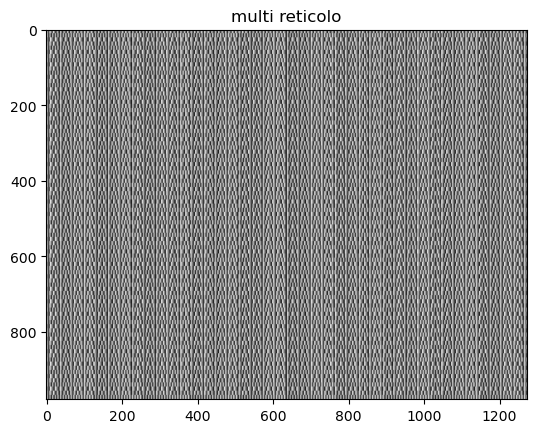

In [39]:
plt.imshow(phase[0:979,:],cmap='gray')
plt.title('multi reticolo')

In [40]:
phase[~mask]=0

In [103]:
focus=0.22 #in meters
lens,lens_bpm=pattern.lente(focus,wavelength,dx,nx,ny)

In [41]:

phase_tot=correction_rad+phase#cgh_rad+correction_rad
phaser_=np.mod(phase_tot,2*np.pi)
phase_r=np.reshape(phaser_,numberpixelsx*numberpixelsy) #srotolo la matrice




Text(0.5, 1.0, 'Pattern da inviare allo SLM')

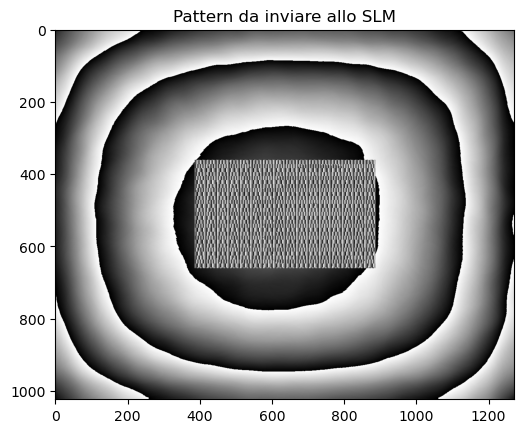

In [42]:
plt.imshow(np.reshape(phaser_,(numberpixelsy,numberpixelsx)),cmap='gray')
plt.title('Pattern da inviare allo SLM')

In [43]:
scaled_phase_r=(phase_r/(2*np.pi))*217      #Riscalo i valori di fase ra 0 e 2pi sui 0:217 livelli
phaser_=scaled_phase_r.astype(np.uint8)
phaser_=phaser_.flatten()

In [44]:
show_slm2.showOn2ndDisplay(monitorNo, windowNo, numberpixelsx, xShift, numberpixelsy, yShift, phaser_)

✅ DLL caricata correttamente.
🪟 Impostazione finestra monitor=2, window=1, shift=(0,0)
🖼️ Invio immagine 1272x1024 allo SLM...


🔌 Finestra SLM chiusa correttamente.


0